In [1]:

#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## TIMESERIES DAY2 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs



In [23]:
#=================================================-
#### Slide 2: Loading packages  ####

import os
import pickle
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from random import gauss
from random import seed
from random import random
from pandas import Series
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox




In [2]:
#=================================================-
#### Slide 23: Directory settings  ####
# set the "notebook root"
nb_root=globals()['_dh']
os.chdir(nb_root[0])

main_dir = os.path.abspath(os.path.join ("..",))

# Make `data_dir` and 'path_dir' from the `main_dir` and
data_dir = os.path.join(main_dir, "data")
plot_dir = os.path.join(main_dir, "plot")

# Set working directory.
os.chdir(data_dir)
# Check working directory.
print(os.getcwd())


/Users/datasociety/Desktop/af-werx/data


In [4]:
#=================================================-
#### Slide 4: Load the dataset  ####

passenger_miles = pickle.load(open("passenger_miles.sav","rb"))
passenger_miles.head()



revenue_passenger_miles  available_seat_miles  unused_seat_miles
date                                                                        
1979-01-01                    15.50                 26.64              11.15
1979-02-01                    16.58                 27.20              10.62
1979-03-01                    18.85                 27.87               9.02
1979-04-01                    17.23                 23.22               5.99
1979-05-01                    16.04                 23.27               7.23

In [5]:
#=================================================-
#### Slide 6: Understand the data  ####

# Dataframe information.
passenger_miles.info()
# Shape of the data
passenger_miles.shape



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 280 entries, 1979-01-01 to 2002-04-01
Data columns (total 3 columns):
revenue_passenger_miles    280 non-null float64
available_seat_miles       280 non-null float64
unused_seat_miles          280 non-null float64
dtypes: float64(3)
memory usage: 8.8 KB


(280, 3)

In [6]:
#=================================================-
#### Slide 7: Recap: key features  ####

passenger_miles.head(4)



revenue_passenger_miles  available_seat_miles  unused_seat_miles
date                                                                        
2002-02-01                    36.01                 53.40              17.39
2002-03-01                    41.21                 54.85              13.64
2002-04-01                    39.50                 55.54              16.04

In [7]:
passenger_miles.tail(4)

revenue_passenger_miles  available_seat_miles  unused_seat_miles
date                                                                        
2002-01-01                    32.79                 51.91              19.12
2002-02-01                    36.01                 53.40              17.39
2002-03-01                    41.21                 54.85              13.64
2002-04-01                    39.50                 55.54              16.04

In [8]:
#=================================================-
#### Slide 8: Recap: key features (cont'd)  ####
passenger_miles.head(20)

revenue_passenger_miles  available_seat_miles  unused_seat_miles
date                                                                        
1979-01-01                    15.50                 26.64              11.15
1979-02-01                    16.58                 27.20              10.62
1979-03-01                    18.85                 27.87               9.02
1979-04-01                    17.23                 23.22               5.99
1979-05-01                    16.04                 23.27               7.23
1979-06-01                    19.11                 27.30               8.19
1979-07-01                    19.88                 29.28               9.40
1979-08-01                    21.47                 31.23               9.76
1979-09-01                    16.55                 28.55              12.00
1979-10-01                    16.55                 27.84              11.28
1979-11-01                    16.42                 27.56              11.14
1979-12-01                    16.31                 28.87              12.56
1980-01-01                    15.68                 28.70              13.02
1980-02-01                    16.07                 28.38              12.31
1980-03-01                    17.94                 28.66              10.72
1980-04-01                    17.05                 28.76              11.71
1980-05-01                    16.15                 27.96              11.82
1980-06-01                    18.67                 29.92              11.25
1980-07-01                    18.50                 30.24              11.74
1980-08-01                    19.60                 30.21              10.61

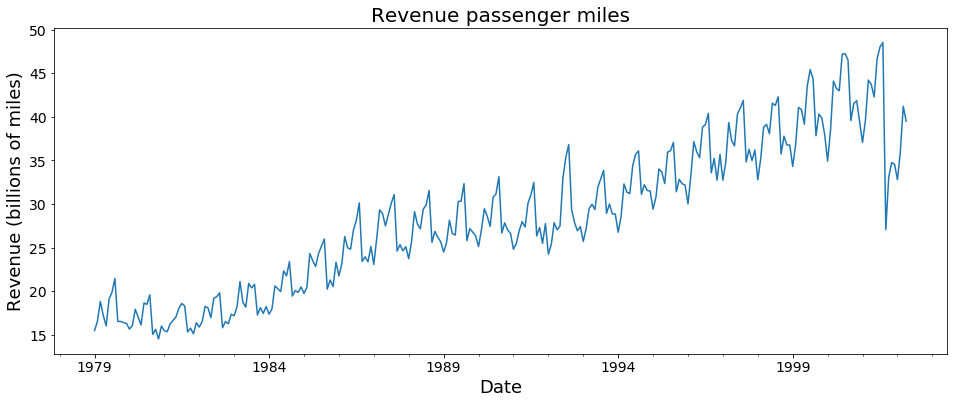

In [9]:
#=================================================-
#### Slide 10: Recap: visualize time series  ####

fig, ax = plt.subplots(figsize = (16, 6))
passenger_miles['revenue_passenger_miles'].plot()
plt.title('Revenue passenger miles',
          fontsize = 20)
plt.xlabel('Date', 
           fontsize = 18)
plt.ylabel('Revenue (billions of miles)', 
           fontsize = 18)
ax.tick_params(labelsize = 14)
plt.show()



In [46]:
#=================================================-
#### Slide 18: Create a white noise series  ####

# Seed random number generator.
seed(1)
# Create white noise series.
series = [gauss(0.0, 1.0) for i in range(1000)]
print(type(series))
series = Series(series)
print(series.head())
type(series)


<class 'list'>
0    1.288185
1    1.449446
2    0.066336
3   -0.764544
4   -1.092173
dtype: float64


pandas.core.series.Series

In [47]:
#=================================================-
#### Slide 19: Summary statistics of a white noise series  ####


# Summary statistics.
print(series.describe())



count    1000.000000
mean       -0.013222
std         1.003685
min        -2.961214
25%        -0.684192
50%        -0.010934
75%         0.703915
max         2.737260
dtype: float64


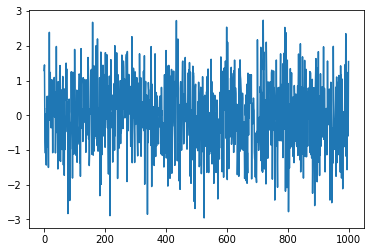

In [48]:
#=================================================-
#### Slide 20: Visualize the white noise series  ####

# Let's create a lineplot of the series.
series.plot()
plt.show()



In [49]:
#=================================================-
#### Slide 22: Autocorrelation of white noise series  ####

# Let's get a maximum lag based on the rule of thumb.
max_k = series.shape[0]//5
print(max_k)

type(series)

200


pandas.core.series.Series

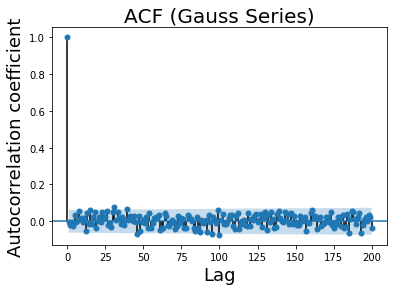

In [50]:
#=================================================-
#### Slide 23: Autocorrelation of white noise series  ####

# Autocorrelation.
plot_acf(series, lags = max_k) #<- adjust k
plt.title('ACF (Gauss Series)', fontsize = 20)
plt.xlabel('Lag', fontsize = 18)
plt.ylabel('Autocorrelation coefficient', fontsize = 18)
ax.tick_params(labelsize = 14)
plt.show()



In [51]:
#=================================================-
#### Slide 27: Implement Ljung-Box test on white noise  ####
ljungbox_test = acorr_ljungbox(series, lags = None, boxpierce = False)
print(type(ljungbox_test))
ljungbox_test = list(ljungbox_test)
print(type(ljungbox_test))
wn_ljung_box_results = pd.DataFrame(ljungbox_test)  # Lags is the largest lag to  report
wn_ljung_box_results

#pd.DataFrame(ljungbox_test)

<class 'tuple'>
<class 'list'>


0         1         2         3         4         5         6   \
0  0.007156  0.437053  0.441174  1.118458  2.204566  2.223040  2.246882   
1  0.932586  0.803702  0.931611  0.891333  0.820176  0.898085  0.944923   

         7         8         9     ...            30         31         32  \
0  5.447484  5.718097  5.723556    ...     37.433611  37.455060  40.203363   
1  0.708851  0.767767  0.837929    ...      0.197674   0.233025   0.181388   

          33         34         35         36         37         38        39  
0  40.628599  40.785698  41.469665  41.926295  41.958073  46.518801  46.60247  
1   0.201420   0.231027   0.244373   0.265711   0.303249   0.190380   0.21925  

[2 rows x 40 columns]

In [52]:
!python -V

Python 3.7.1


In [54]:
#=================================================-
#### Slide 28: Implement Ljung-Box test on not white noise  ####

no_wn_ljung_box_results = pd.DataFrame(list(acorr_ljungbox(passenger_miles['revenue_passenger_miles'], lags=None,boxpierce=False)))  # Lags is the largest lag to  report
no_wn_ljung_box_results



0              1              2              3              4   \
0  2.492104e+02   4.780598e+02   6.948475e+02   9.098926e+02   1.105707e+03   
1  3.860032e-56  1.551106e-104  2.749747e-150  1.197410e-195  7.767625e-237   

              5          6            7            8           9      ...      \
0   1.288959e+03  1483.8204  1697.222508  1905.720209  2116.13977     ...       
1  2.659760e-275     0.0000     0.000000     0.000000     0.00000     ...       

            30           31           32           33           34  \
0  5389.965581  5498.805112  5602.884434  5708.052239  5815.982811   
1     0.000000     0.000000     0.000000     0.000000     0.000000   

            35           36           37           38          39  
0  5932.643984  6031.027194  6118.359967  6197.855967  6274.65984  
1     0.000000     0.000000     0.000000     0.000000     0.00000  

[2 rows x 40 columns]

In [20]:
#=================================================-
#### Slide 31: Exercise 1  ####





In [56]:
#=================================================-
#### Slide 43: Random walk model - create dataset  ####

from random import seed, random

seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
    

    # Convert random walk into a df for convenience
random_walk_df = pd.DataFrame(random_walk)

print(random_walk_df.head())
print(random_walk_df.tail())

   0
0 -1
1  0
2  1
3  0
4 -1
      0
995  54
996  55
997  54
998  53
999  54


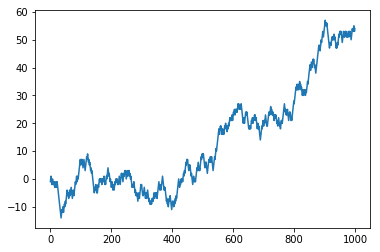

In [57]:
plt.plot(random_walk_df)

In [58]:
#=================================================-
#### Slide 49: Random walk model - testing for stationarity  ####

# Statistical test.
result = adfuller(random_walk)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))



ADF Statistic: 0.341605
p-value: 0.979175
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


In [61]:
#=================================================-
#### Slide 50: Random walk model - differencing  ####

# Take difference
diff = list()
for i in range(1, len(random_walk)):
    value = random_walk[i] - random_walk[i - 1]
    diff.append(value)

diff_df = pd.DataFrame(diff)

diff_df.head()

0
0  1
1  1
2 -1
3 -1
4 -1

In [64]:
#=================================================-
#### Slide 53: Random walk model - first difference  ####

# Separate revenue passenger miles.
rpm = passenger_miles['revenue_passenger_miles']

# Take difference of revenue_passenger_miles.
diff_rpm = list()
for i in range(1, len(rpm)):
    value = random_walk[i] - random_walk[i - 1]
    diff_rpm.append(value)

# Save differences as a dataframe.
diff_rpm_df = pd.DataFrame(diff_rpm)

diff_rpm_df.head()

0
0  1
1  1
2 -1
3 -1
4 -1

In [66]:
#=================================================-
#### Slide 56: Random walk model - create lagged dataset  ####

# Create lagged dataset.
values = pd.DataFrame(diff_rpm_df.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
print(dataframe.head(5))



   t-1  t+1
0  NaN    1
1  1.0    1
2  1.0   -1
3 -1.0   -1
4 -1.0   -1


In [67]:
#=================================================-
#### Slide 57: Random walk model - prediction  ####

# Prepare dataset, split into training and test sets, 70-30 split.
X = dataframe.values
train_size = int(len(X) * 0.70)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# Run the persistence model.
def model_persistence(x):
    return x

# Walk-forward validation.
predictions = list()

for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)



Test MSE: 2.143
